In [1]:
#!jt -l
# !jt -t oceans16 -T
# !jt -r

Notas:
--------
- [x] Estudiar Recency.__
    - [x] Histograma Row simple
    - [x] Probar esta función
    - [x] Implementar

##### Tarea anterior 

- [x] __Construir la variable Recency.__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Contruir Frecuency__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar
- [x] __Construir Monetary__
    - [x] Sección para caso pequeño
    - [x] Función para estadnarizar
    - [x] Probar esta función
    - [x] Implementar   

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [10]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Dicionario 
rename aplicado a `Precio promedio`

In [11]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']

        }

### Colores 

In [7]:
# ('{:X}{:X}{:X}').format(31, 119, 180)
# ('{:X}{:X}{:X}').format(219, 96, 97)
# ('{:X}{:X}{:X}').format(87, 219, 95)
('{:X}{:X}{:X}').format(255, 126, 14)

'FF7EE'

# Uso de F file

- `data_i_M`: Monetary 
- `Clientes_i_RFM`: RFM Clientes 

## Abrir Archivo   Facturaciones


Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### Data Facturaciones 

###### abrir 

In [13]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT M'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_M = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
data_i_M.head(1)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Ingreso de Venta CLP,Monetary
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,28600,0.0


##### Funcion

###### def 

In [20]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_Refinada(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

    
    
#=================================
# Proceso Recency a Int 
#=================================
        
#     df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
    
#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               ,'Recency días'
#               ,'Frecuency_Row'
              ,'Monetary'
              ,'Ingreso de Venta CLP'
             ]:
        df[i]=df[i].astype('float64').astype('int64')
        
# #=================================
# # Agregar nombre al codigo del producto
# #=================================
#     def material_name(x):
#         s1=str(x['Material'])
#         s2=str(x['Nivel 4.1'])
#         return(s1+'('+s2+')')
#     df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df


###### aplicación 

In [21]:
data_i_M=Ajuste_data_Refinada(data_i_M)
data_i_M.head(2)

Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Ingreso de Venta CLP     int64
Monetary                 int64
dtype: object
Time Lapsed = 0:0:1.6755213737487793 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Ingreso de Venta CLP,Monetary
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,28600,0
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3,129140,0


### Exploración F

##### histograma 

In [22]:
data_i_M.shape

(198596, 20)

In [23]:
data_i_M.columns

Index(['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Día natural',
       'Día Semana', 'Semana', 'Mes', 'Año', 'Población', 'Centro', 'Cliente',
       'Cluster', 'Segmento.1', 'Categoría Cliente', 'Año Creación',
       'Material Favorito', 'Frecuencia Historica', 'Mes_num',
       'Ingreso de Venta CLP', 'Monetary'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Ingreso de Venta CLP'}>,
        <AxesSubplot:title={'center':'Monetary'}>]], dtype=object)

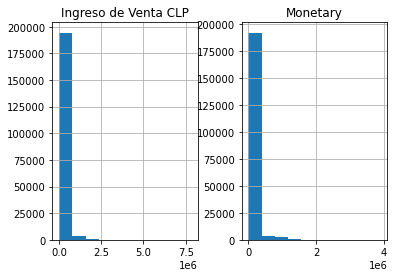

In [24]:
data_i_M[['Ingreso de Venta CLP', 'Monetary']].hist()

In [28]:
data_i_M[(data_i_M.Año=='2021')]\
[['Ingreso de Venta CLP', 'Monetary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Ingreso de Venta CLP,63389.0,111220.073641,210833.038391,11340.0,30580.0,56760.0,107360.0,4412000.0
Monetary,63389.0,100511.998911,178198.275582,0.0,32573.0,53283.0,98811.0,3027644.0


In [35]:
print(data_i_M[(data_i_M.Año=='2021')]\
[['Ingreso de Venta CLP', 'Monetary']].describe().T.to_latex\
      (float_format="{:,.2f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &       mean &        std &       min &       25\% &       50\% &        75\% &          max \\
\midrule
Ingreso de Venta CLP & 63,389.00 & 111,220.07 & 210,833.04 & 11,340.00 & 30,580.00 & 56,760.00 & 107,360.00 & 4,412,000.00 \\
Monetary             & 63,389.00 & 100,512.00 & 178,198.28 &      0.00 & 32,573.00 & 53,283.00 &  98,811.00 & 3,027,644.00 \\
\bottomrule
\end{tabular}



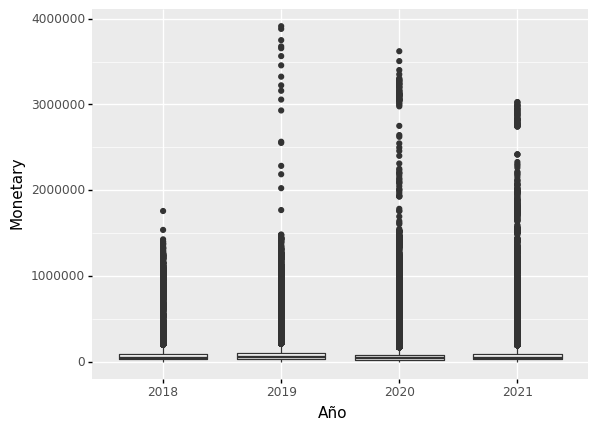

<ggplot: (97154318918)>

In [37]:
ggplot(data_i_M,aes(x='Año'
                    ,y='Monetary'))\
+geom_boxplot()
# (mapping=None, data=data_i_M, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

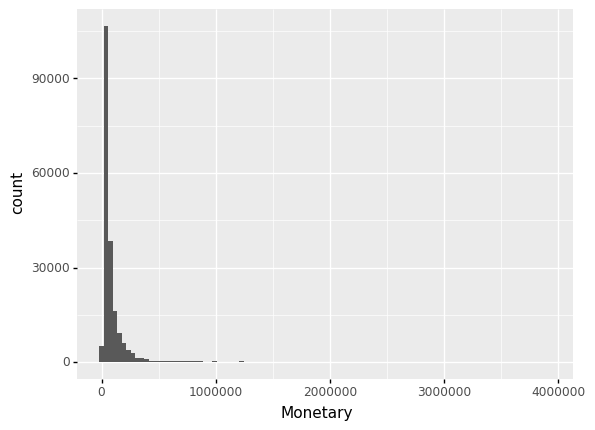

<ggplot: (97154374530)>

In [38]:
ggplot(data_i_M,aes(x='Monetary'))\
+geom_histogram(bins=100)
# (mapping=None, data=data_i_M, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

##### Disperción 

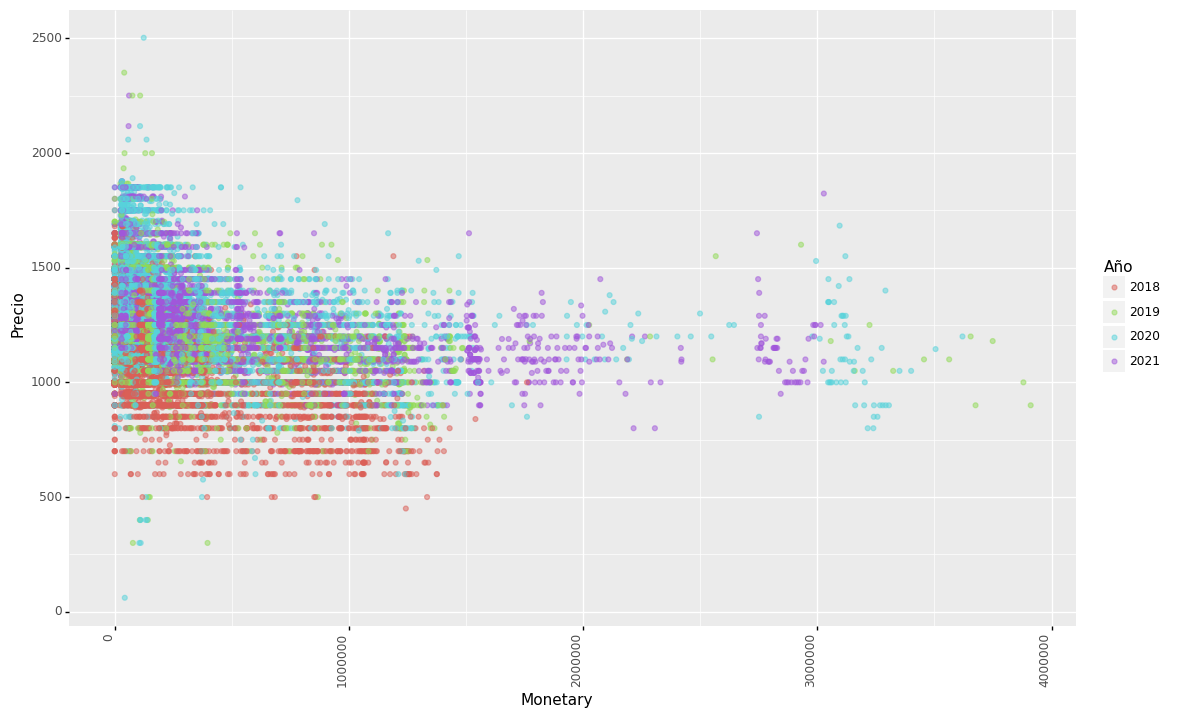

<ggplot: (97154547706)>

In [39]:
df=data_i_M.copy()
X_Graph='Monetary'
Y_Graph='Precio'
df[X_Graph]=df[X_Graph].astype('int64')
# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

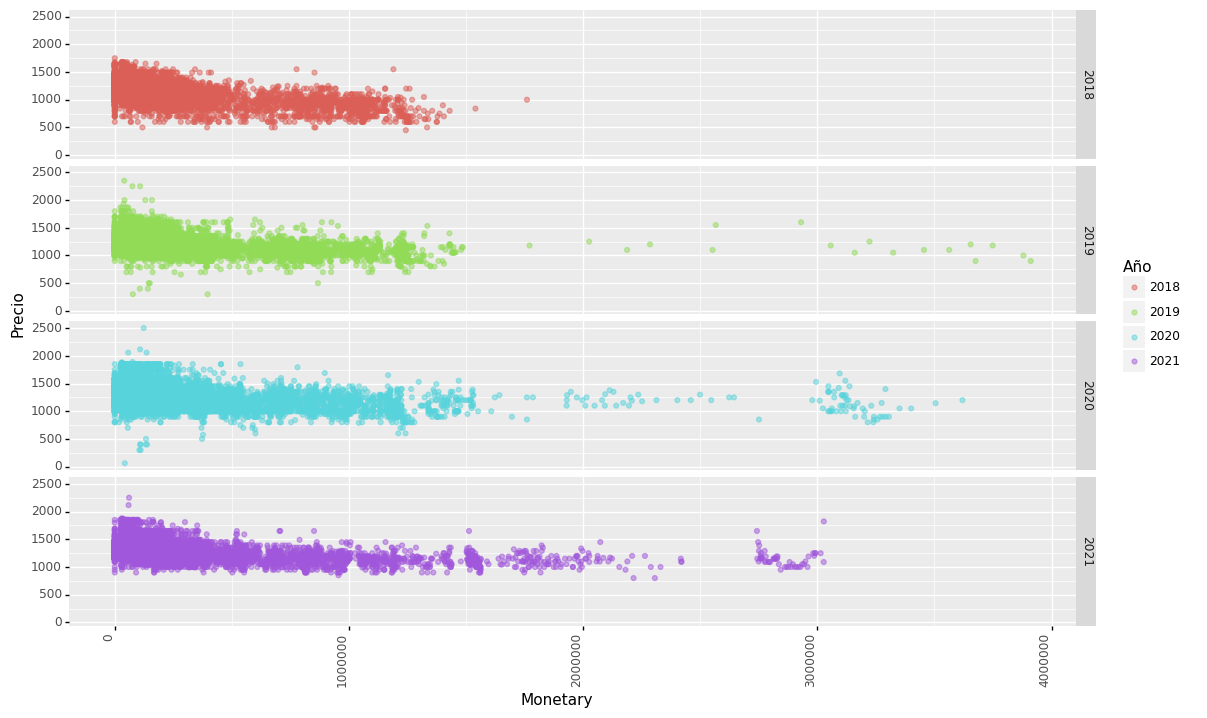

<ggplot: (97154729436)>

In [40]:
df=data_i_M.copy()
X_Graph='Monetary'
Y_Graph='Precio'
df[X_Graph]=df[X_Graph].astype('int64')
# df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
# df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color='Año'
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(13,8)) 

)      

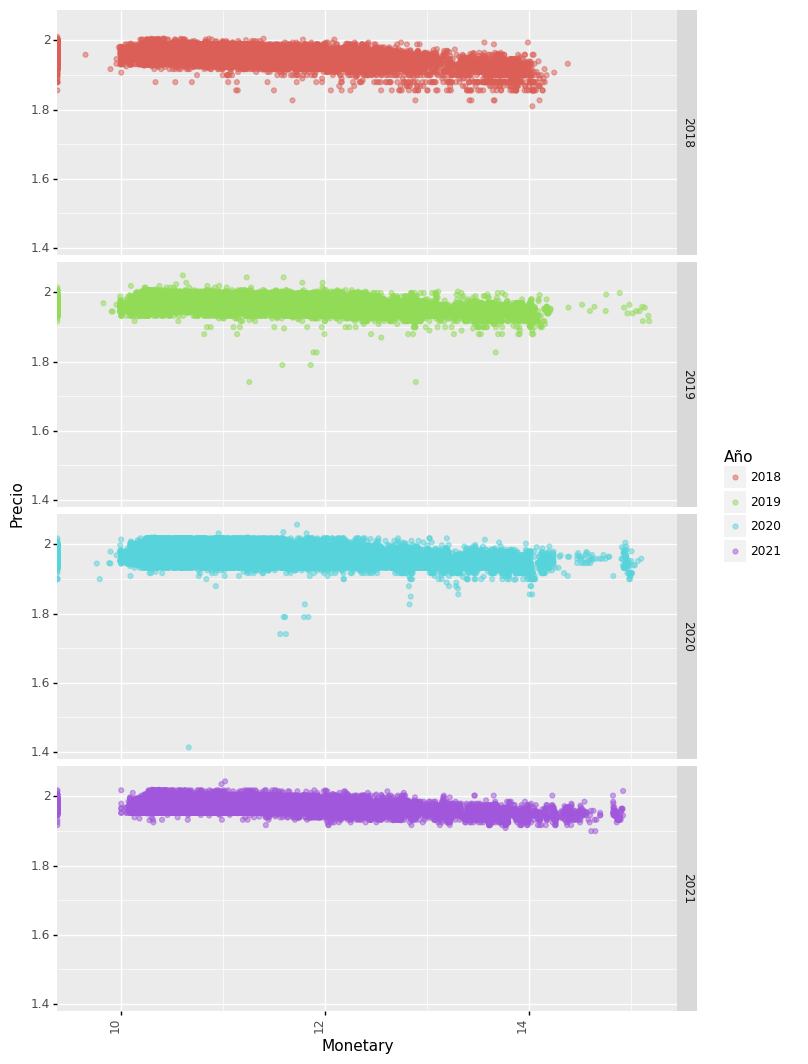

<ggplot: (97050183551)>

In [41]:
df=data_i_M.copy()
X_Graph='Monetary'
#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Año'


#int
df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('Año~.')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,13)) 

)      

In [42]:
Dic_col['Base']

['Material (Nombre)', 'Kilos Venta KG', 'Precio', 'Cliente']

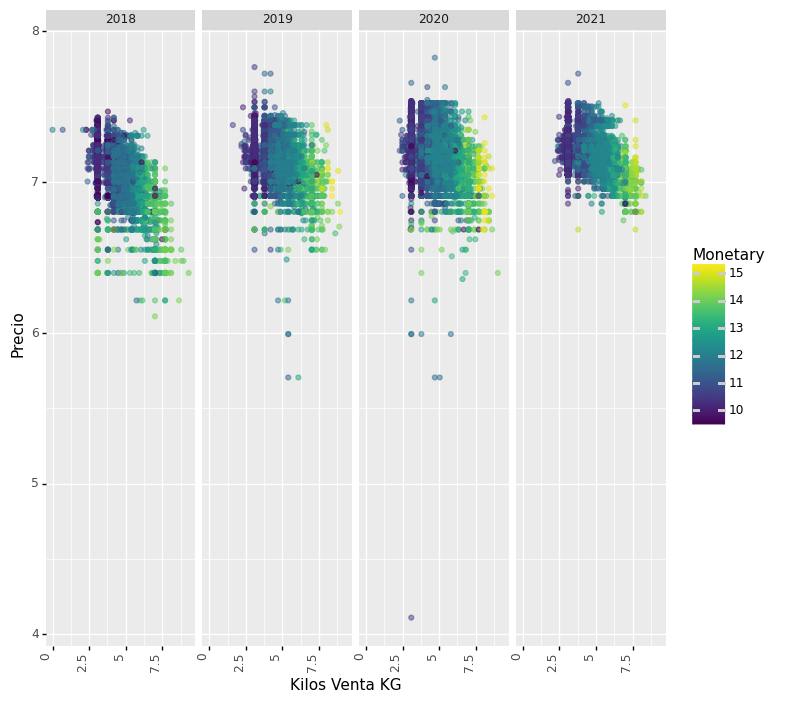

<ggplot: (97057570717)>

In [43]:
df=data_i_M.copy()
X_Graph='Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Monetary'


#int
df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
            ,color=Color_Graph
                 ))
+geom_point(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

 ####  geom_bin2d

C:\Users\user\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin_2d : Removed 5073 rows containing non-finite values.


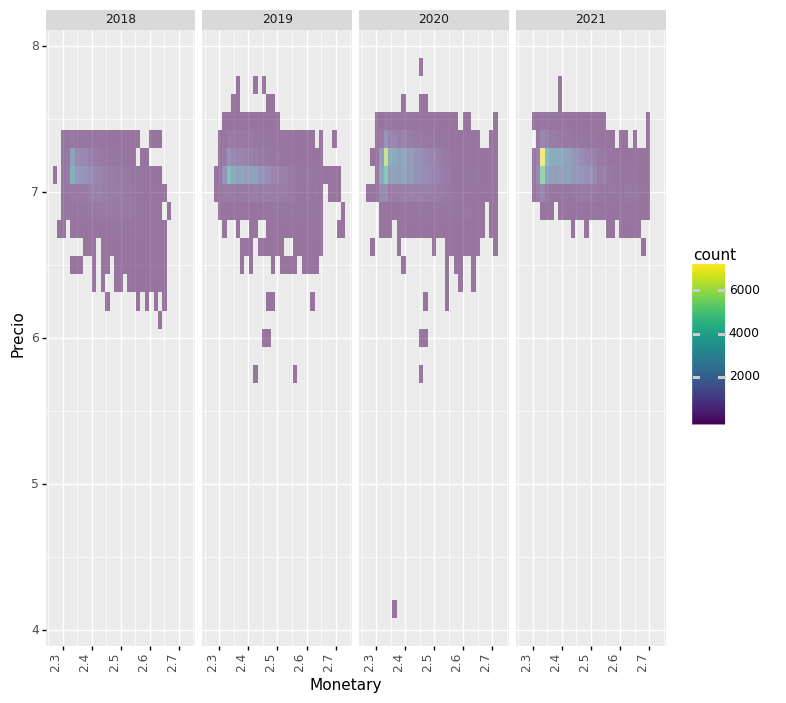

<ggplot: (97043813208)>

In [128]:
df=data_i_M.copy()
X_Graph='Monetary'#'Kilos Venta KG'
Y_Graph='Precio'
Color_Graph='Monetary'


#int
df[X_Graph]=df[X_Graph].astype('int64')

df[X_Graph]=df[X_Graph].apply(lambda x:  np.log(x))
df[Y_Graph]=df[Y_Graph].apply(lambda x:  np.log(x))
df[Color_Graph]=df[Color_Graph].apply(lambda x:  np.log(x))


# df_mean[X_Graph]=df_mean[X_Graph].astype('int64')

(ggplot(df#[df[Y_Graph]>0]
            , aes(x=X_Graph#'Día numero'#'Fecha',
            ,y=Y_Graph
#             ,color=Color_Graph
                 ))
+geom_bin2d(alpha=0.5)
+facet_grid('.~Año')
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,8)) 

)      

###### Descripción por cliente 

In [44]:
df_G=data_i_M[['Cliente','Monetary']].groupby('Cliente').describe()
df_G

Monetary                                                         \
            count           mean           std  min        25%       50%   
Cliente                                                                    
10003742      1.0       0.000000           NaN  0.0       0.00       0.0   
10007508    208.0  106546.394231  13419.174513  0.0  103737.25  110416.0   
10017269     78.0   28931.948718   3339.688367  0.0   29117.00   29230.5   
10023880     20.0   35071.750000   8787.645286  0.0   33509.50   37972.5   
10028999     13.0   27051.538462   8144.138420  0.0   28765.00   29223.0   
...           ...            ...           ...  ...        ...       ...   
9992154      70.0   54885.414286  13033.373439  0.0   47597.00   50313.0   
9993925     543.0  162185.668508  28629.062181  0.0  142156.50  169594.0   
9994662      11.0   24613.090909   8303.722520  0.0   25208.00   27456.0   
9994800       3.0   19506.666667  16944.761236  0.0   13970.00   27940.0   
9997223       1.0       0.000000           NaN  0.0       0.00       0.0   

                               
                75%       max  
Cliente                        
10003742       0.00       0.0  
10007508  115729.50  129140.0  
10017269   29566.00   31372.0  
10023880   38845.00   40920.0  
10028999   29731.00   30091.0  
...             ...       ...  
9992154    61267.75   88330.0  
9993925   185663.50  200177.0  
9994662    28380.00   28624.0  
9994800    29260.00   30580.0  
9997223        0.00       0.0  

[5073 rows x 8 columns]

## Data Customers
 

###### abrir 

In [45]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Clientes_1010078_CT RFM'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Clientes_i_RFM= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Clientes_i_RFM.head(1)

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.0033444816053511705,22.0,1300.0,2007.0,19.0,28600.0


In [46]:
Clientes_i_RFM.iloc[1]

Cliente                                    10007508
Fecha ultima Compra                      2021-10-26
Recency Actual                                    0
Fecha Creacion                           2018-03-01
Frecuency Actual del Cliente     0.2017524296094161
Kilos Venta KG Promedio           93.15865384615384
Precio Promedio                  1266.8942307692307
Año Creación Promedio                        2007.0
Frecuencia Historica Promedio                 464.0
Ingreso de Venta Promedio        117683.47115384616
Name: 1, dtype: object

In [96]:
Dic_col.keys()

dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos', 'RFM Row', 'RFM Customers'])

In [105]:
Clientes_i_RFM[Dic_col[ 'RFM Customers'][2]]=\
Clientes_i_RFM['Ingreso de Venta Promedio'].round(2)
Clientes_i_RFM.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio,Monetary Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000,28600.00
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154,117683.47
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718,29699.45
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000,38390.00
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692,29060.31


### Función Ajuste 

###### def  `Ajuste_Clientes_RFM`

In [47]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_Clientes_RFM(data):
    start_time = time.time()
    df=data.copy()

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in [
            #RFM
            'Recency Actual'
            ,'Frecuency Actual del Cliente'
            ,'Ingreso de Venta Promedio'
              
            #Val Fact
            ,'Kilos Venta KG Promedio'
            ,'Precio Promedio'
            
            # Val historicos (ind del producto)
            ,'Año Creación Promedio'
            ,'Frecuencia Historica Promedio'
             ]:
        df[i]=df[i].astype('float64')
        #.astype('int64')
        
    for i in [
                #RFM
                'Recency Actual'
#                 ,'Frecuency Actual del Cliente'
#                 ,'Ingreso de Venta Promedio'

                #Val Fact
#                 ,'Kilos Venta KG Promedio'
#                 ,'Precio Promedio'

                # Val historicos (ind del producto)
                ,'Año Creación Promedio'
                ,'Frecuencia Historica Promedio'
                ]:
        df[i]=df[i].astype('int64')
        


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    for date in ['Fecha ultima Compra','Fecha Creacion']:
        df[date] = df[date].apply(lambda x: 
                                            datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

##### Aplicación

In [48]:
Clientes_i_RFM=Ajuste_Clientes_RFM(Clientes_i_RFM)

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
Time Lapsed = 0:0:0.09208369255065918 
 H:m:s


# Analisis

Dataframes de interes:

- df_fecha_fin:
    - Respresneta el Recency ctual
    - `(df_fecha_fin.rename(columns={'Recency Actual':'Recency actual del Cliente'})`
    
    
- data_i_M:
    
    - `Recency días`
    - Representa el Recency al momento de realizar al compra.
- df_g:

    - Representa el valor promedio del Recency del cliente
    -`df_g.rename(columns ={'Monetary':'Recency Promedio Cliente'})`
            

## groupby Frecuency  mean for each client 

In [50]:
Dic_col['RFM Row'][2]

'Monetary'

In [52]:
data_i_M.head(2)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Ingreso de Venta CLP,Monetary
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,28600,0
61456,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,10007508,Clásico,Cobertura Mediano SD,Especialista en Crud,2007,1020253,464,3,129140,0


In [54]:
df_M_row_Promedio=data_i_M[[ 'Cliente', Dic_col['RFM Row'][2]]].groupby('Cliente').mean().reset_index()#
# rename
df_M_row_Promedio=df_M_row_Promedio.rename(columns={'Monetary':'Monetary Promedio Cliente'})
df_M_row_Promedio.head()

,Cliente,Monetary Promedio Cliente
0,10003742,0.000000
1,10007508,106546.394231
2,10017269,28931.948718
3,10023880,35071.750000
4,10028999,27051.538462


###### histograma 

<AxesSubplot:>

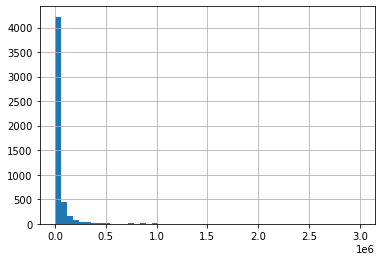

In [65]:
df_M_row_Promedio['Monetary Promedio Cliente'].hist(bins=50)

<AxesSubplot:>

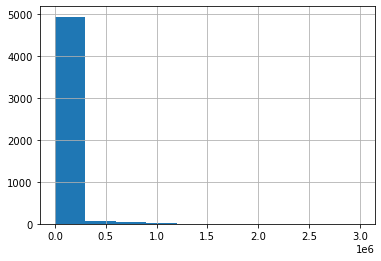

In [66]:
df_M_row_Promedio['Monetary Promedio Cliente'].hist()

<AxesSubplot:>

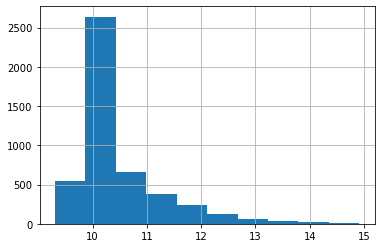

In [62]:
df_M_row_Promedio['Log Monetary Promedio Cliente']=\
df_M_row_Promedio[df_M_row_Promedio['Monetary Promedio Cliente']>0]['Monetary Promedio Cliente'].apply(lambda x: np.log(x))
df_M_row_Promedio['Log Monetary Promedio Cliente'].hist()

## Tablas 


##### Filas de cada distribcuión 

###### Actual por Cliente

In [67]:
Dic_col.keys()

dict_keys(['Base', 'Fecha', 'Ubicacion', 'Cliente Categoria', 'Cliente Atributos', 'RFM Row', 'RFM Customers'])

In [68]:
Clientes_i_RFM.columns

Index(['Cliente', 'Fecha ultima Compra', 'Recency Actual', 'Fecha Creacion',
       'Frecuency Actual del Cliente', 'Kilos Venta KG Promedio',
       'Precio Promedio', 'Año Creación Promedio',
       'Frecuencia Historica Promedio', 'Ingreso de Venta Promedio'],
      dtype='object')

In [69]:
df_Actual=pd.DataFrame(
(Clientes_i_RFM['Ingreso de Venta Promedio'].describe())).T.round(3)
df_Actual

,count,mean,std,min,25%,50%,75%,max
Ingreso de Venta Promedio,5073.0,69506.759,152342.115,20700.0,28292.0,30206.0,44733.571,2754332.565


######  Promedio de Cada Cliente sobre sus Facturas

In [71]:
df_F_row_Promedio

,Cliente,Monetary Promedio Cliente
0,10003742,0.000000
1,10007508,106546.394231
2,10017269,28931.948718
3,10023880,35071.750000
4,10028999,27051.538462
...,...,...
5068,9992154,54885.414286
5069,9993925,162185.668508
5070,9994662,24613.090909
5071,9994800,19506.666667


In [70]:
df_gro_P=pd.DataFrame(
(df_F_row_Promedio.describe().round(3))).T
df_gro_P

,count,mean,std,min,25%,50%,75%,max
Monetary Promedio Cliente,5073.0,57045.684,135900.312,0.0,21633.2,26679.0,39119.361,2994593.032


###### Facturas

In [72]:
df=data_i_M.copy()
df=df.rename(columns ={'Monetary':'Monetary Facturas'})
df.head(1)

,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Ingreso de Venta CLP,Monetary Facturas
61455,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,10003742,Clásico,Cobertura Pequeno SD,Especialista en Proc,2007,1010077,19,5,28600,0


In [74]:
df_Fact_P=pd.DataFrame(
(df['Monetary Facturas'].describe())).T.round(3).copy()
df_Fact_P

,count,mean,std,min,25%,50%,75%,max
Monetary Facturas,198596.0,101377.945,176936.654,0.0,32044.0,51633.0,97011.25,3910917.0


In [75]:
print(pd.DataFrame(
(df.describe())['Monetary Facturas']).T.round(2).to_latex(float_format="{:,.1f}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &      mean &       std &  min &      25\% &      50\% &      75\% &         max \\
\midrule
Monetary Facturas & 198,596.0 & 101,377.9 & 176,936.6 &  0.0 & 32,044.0 & 51,633.0 & 97,011.2 & 3,910,917.0 \\
\bottomrule
\end{tabular}



##### Juntar ambas tablas

In [76]:
pd.concat([
            df_Fact_P
            ,df_gro_P
           ,df_Actual
            ])

,count,mean,std,min,25%,50%,75%,max
Monetary Facturas,198596.0,101377.945,176936.654,0.0,32044.0,51633.0,97011.250,3910917.000
Monetary Promedio Cliente,5073.0,57045.684,135900.312,0.0,21633.2,26679.0,39119.361,2994593.032
Ingreso de Venta Promedio,5073.0,69506.759,152342.115,20700.0,28292.0,30206.0,44733.571,2754332.565


##### Latex 

In [85]:
print(pd.concat([
            df_Fact_P
            ,df_gro_P
           ,df_Actual
            ]).to_latex\
      (float_format="{:,.0f}".format)
#      ()
     )

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &    mean &     std &    min &    25\% &    50\% &    75\% &       max \\
\midrule
Monetary Facturas         & 198,596 & 101,378 & 176,937 &      0 & 32,044 & 51,633 & 97,011 & 3,910,917 \\
Monetary Promedio Cliente &   5,073 &  57,046 & 135,900 &      0 & 21,633 & 26,679 & 39,119 & 2,994,593 \\
Ingreso de Venta Promedio &   5,073 &  69,507 & 152,342 & 20,700 & 28,292 & 30,206 & 44,734 & 2,754,333 \\
\bottomrule
\end{tabular}



In [86]:
print(pd.concat([
            df_Fact_P
            ,df_gro_P
           ,df_Actual
            ]).to_latex\
      (float_format="{:,.2f}".format)
#      ()
     )

\begin{tabular}{lrrrrrrrr}
\toprule
{} &      count &       mean &        std &       min &       25\% &       50\% &       75\% &          max \\
\midrule
Monetary Facturas         & 198,596.00 & 101,377.95 & 176,936.65 &      0.00 & 32,044.00 & 51,633.00 & 97,011.25 & 3,910,917.00 \\
Monetary Promedio Cliente &   5,073.00 &  57,045.68 & 135,900.31 &      0.00 & 21,633.20 & 26,679.00 & 39,119.36 & 2,994,593.03 \\
Ingreso de Venta Promedio &   5,073.00 &  69,506.76 & 152,342.11 & 20,700.00 & 28,292.00 & 30,206.00 & 44,733.57 & 2,754,332.56 \\
\bottomrule
\end{tabular}



### Histograma Sencillo

##### Grafico 

###### plop

In [ ]:
df_fecha_fin.hist()

In [ ]:
ggplot()\
    +geom_histogram(df_fecha_fin,aes(x='Recency Actual')
                    ,fill='r',bins=30,alpha=1
                   
                   )\
    +geom_histogram(df_g,aes(x='Recency Promedio Cliente')
                    ,fill='b',bins=30,alpha=0.5
                   
                   )\
        
#     +geom_histogram(data=df_g,bins=30,)
    #binwidth=0.5)
# (mapping=None, data=data_i_M, stat='bin', position='stack',
#                na_rm=False, inherit_aes=True, show_legend=None, raster=False)
#                **kwargs)

###### union 

In [ ]:
print(df_fecha_fin.shape,
     df_g.shape)
pd.merge(df_fecha_fin
,df_g,how= 'inner').shape

In [ ]:
#  {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
print(df_fecha_fin.shape,
     df.shape)

df_merg=pd.merge(df_fecha_fin
,df_g,how= 'inner')
df_merg.shape

In [ ]:
#  {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
print(df_fecha_fin.shape,
     df.shape)

df_merg=pd.concat([df_fecha_fin
,df_g])
df_merg.shape

In [ ]:
df_merg.head()

## Histograma

##### Listado Histogramas 

###### Datos 

In [91]:
Dic_col['RFM Customers'][2]

'Monetary Actual'

In [106]:
Clientes_i_RFM[ Dic_col['RFM Customers'][2]]

0        28600.00
1       117683.47
2        29699.45
3        38390.00
4        29060.31
          ...    
5068     46135.60
5069    200374.35
5070     28700.00
5071     27060.00
5072     23980.00
Name: Monetary Actual, Length: 5073, dtype: float64

In [107]:
df_F_row_Promedio

,Cliente,Monetary Promedio Cliente
0,10003742,0.000000
1,10007508,106546.394231
2,10017269,28931.948718
3,10023880,35071.750000
4,10028999,27051.538462
...,...,...
5068,9992154,54885.414286
5069,9993925,162185.668508
5070,9994662,24613.090909
5071,9994800,19506.666667


In [108]:
data_i_M.Monetary

61455          0
61456          0
61457     129140
61458     103312
61459      91600
           ...  
297036     28380
297037         0
297038     30580
297039     27940
297040         0
Name: Monetary, Length: 198596, dtype: int64

In [109]:
Dic_col['RFM Customers']

['Recency Actual', 'Frecuency Actual del Cliente', 'Monetary Actual']

In [110]:
list_df=[Clientes_i_RFM

         ,data_i_M

#          ,df_F_row_Promedio
        ]

list_Xcol=['Monetary Actual'

             ,'Monetary'

#             ,'Monetary Promedio Cliente'
            ]

List_Colores=['#1F77B4', '#DB6061','#57DB5F']

List_Title=['Monetary actual del Cliente'

             ,'Monetary Facturas'

#             ,'Monetary Promedio del Cliente'
            ]

###### Cantidad de datos

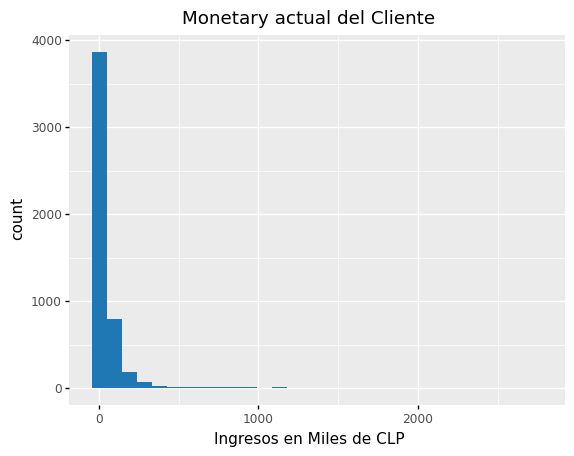

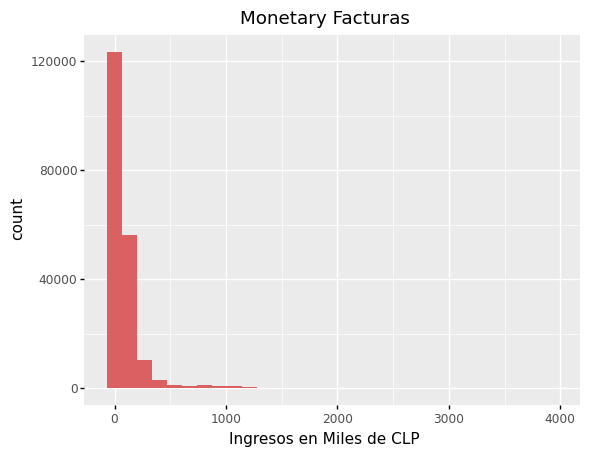

[<ggplot: (97045155325)>, <ggplot: (97044785598)>]

In [132]:
[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])].apply(lambda x: x/1000)
        
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    
     +xlab('Ingresos en Miles de CLP')
     +ggtitle(List_Title[i])
 )
 for i in range(len(list_df))]#len(list_df)

###### Porcentaje 

In [112]:
from mizani.formatters import percent_format

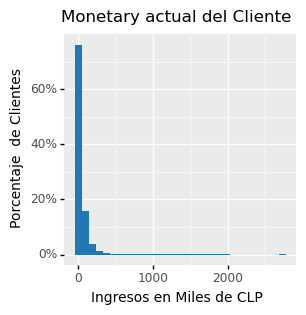

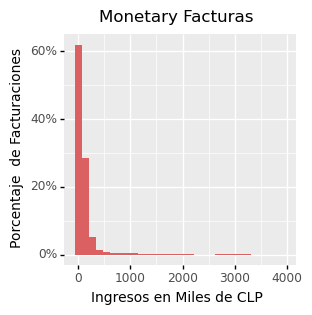

[<ggplot: (97040145481)>, <ggplot: (97040343507)>]

In [134]:
List_Graph_histo_Porcj=[(
    
    ggplot(
    list_df[i]
    ,aes(x= list_df[i][(list_Xcol[i])].apply(lambda x: x/1000)
        ,y=after_stat('width*density')
        ))
    
    +geom_histogram(fill=List_Colores
                    [i],bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
    + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    +xlab('Ingresos en Miles de CLP')
    +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][i])
    +ggtitle(List_Title[i])
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    
    
#         +scale_x_continuous(labels =  "{:,.1f}".format
#                         breaks =range(0,1750,250)                            )

)
 for i in range(len(list_df))]#len(list_df)

List_Graph_histo_Porcj

In [135]:
"{:,.1f}".format(5000)

'5,000.0'

### Save pdf /png 

##### PNG 

In [136]:
List_Title

['Monetary actual del Cliente', 'Monetary Facturas']

In [137]:
# ```python
j=0
for i in List_Title:
    G_Lista=List_Graph_histo_Porcj
    file_name=('Histograma ('+ i +') del Canal_Tradic_ sobre el '+Y_producto)
    
    pngfill= Png_file_direct_Graphic_Canal_Material+"\\RFM"
    
    
    print('-----------\n Nombre del archivo \n',
          file_name,
          '\n Dirección \n',pngfill)
    ggsave(plot = G_Lista[j]
       ,filename = file_name, 
       path =pngfill
      ,dpi = 300
      )
    j+=1
# ```

-----------
 Nombre del archivo 
 Histograma (Monetary actual del Cliente) del Canal_Tradic_ sobre el 1010078 
 Dirección 
 C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\RFM


C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\RFM\Histograma (Monetary actual del Cliente) del Canal_Tradic_ sobre el 1010078


-----------
 Nombre del archivo 
 Histograma (Monetary Facturas) del Canal_Tradic_ sobre el 1010078 
 Dirección 
 C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\RFM


C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 3 x 3 in image.
C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\RFM\Histograma (Monetary Facturas) del Canal_Tradic_ sobre el 1010078


In [138]:
# ```python
#============================
#
#============================
file_name=('Histogramas (Monetary) del Canal_Tradic_ sobre el '+Y_producto)
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\RFM"

start_time = time.time()
save_as_pdf_pages(
                    List_Graph_histo_Porcj
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
# ```

C:\Users\user\anaconda3\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: C:\Users\user\Documents\Graficos\Canal Tradicional\1010078\RFM\Histogramas (Monetary) del Canal_Tradic_ sobre el 1010078.pdf


Time Lapsed = 0:0:0.693026065826416 
 H:m:s
